# SIMULACIÓN | PROYECTO UNIDAD 1




## INSTRUCCIONES

- El objetivo del proyecto es poner en práctica los contenidos aprendidos en la segunda unidad de Números aleatorios y MCMC. 


- Se presentan las actividades a desarrollar, cada una de ella contiene un set de instrucciones, preguntas y su puntaje asociado. **Las preguntas deben ser respondidas en celdas de texto** (no se considera respuesta si está en un comentario entre las líneas de código)


- Al finalizar presente las conclusiones de su trabajo. 


- El título del notebook debe ser: proyecto1_Apellido1_Apellido2_Apellido3


- Fecha límite de entrega: 14 de abril 23:59 horas. 


- Este trabajo pondera un 25% del total del curso 

**Integrantes:** 

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 100

import seaborn as sns

from IPython.core.pylabtools import figsize

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import random

## Parte I : Generación de números aleatorios



Para el cálculo de áreas con el método de monte carlo es necesario utilizar números aleatorios. Para ello cree los siguientes métodos 
de generación de números aleatorios: 

Existen diversas fórmulas para generar números aleatorios, como las siguientes:

1. Algoritmo medios cuadrados. 

  pruebe con: $x_0 = 1009$

2. Metodo congruencial lineal con parametros a, b y modulo. 

  $xi = a_0 + a_1x_{i−1} \mod M.$
  pruebe con: 
  $x_n = 5x_{n−1} + 1 \mod 9, x_0 = 1$
  $x_n = 5x_{n−1} + 3 \mod 16, x_0 = 7$

3. multiplicative congruential generator : 
  $x_i = a_1 x_{i−1} \mod M$

4. multiple recursive generator
  $x_i=a_1x_{i−1}+a_2x_{i−2}+···+a_kx_{i−k} \mod M$

5. Lagged Fibonacci generators
  $x_i = x_{i−r} + x_{i−s} \mod M$

6. inversive congruential generator:

  $ x_i=\left \{
  \begin{array}{1} 
      a_0 + a_1x^{-1}_{i-1} \mod M ,   x_{i-1}	\neq 0  
  \\ {a_0} \end{array} \right. $

(Ver laboratorio 4) 

- Escoja tres métodos e impleméntelos, simule conjuntos de 10.000 datos y grafique la posición de los puntos. 

    R : Multiple recursive generator, inversive congruential generator, multiplicative congruential generator.


1. simulando los conjuntos de datos 100 veces ¿cuál es el promedio de las medias para cada método?.

    El promedio de  Multiple_recursive_generator es aproximadamente es de:  0.473

    El promedio de  multiplicative_congruential_generator es aproximadamente de:  0.448

    El promedio de  inversive_congruential_generator es aproximadamente de:  0.4676
    

2. generando números de [0,1] ¿cuántos datos, en promedio, se requieren para que la suma sea superior a 1?. ¿cuál de los métodos de generación de números aleatorios entrega un valor más cercano al número $e$? [1]

    R: Los datos necesarios que se necesitan en promedio para que la suma sea superior a 1, es e (euler), por lo que si se habla de cual es el mejor metodo de numeros aleatorios es de multiple recursive generator, ya que es el más "uniforme" de los metodos elejidos.


3. ¿Qué tésts se deberían realizar a estos conjuntos de datos para comprobar que son números aleatorios válidos? [2]

    R: La tesis que se debería realizar el el test de chi cuadrado, para saber si es realmente uniforme, comparando la dristribución de las partes (en porcentaje), con la distribución ue resulto para cada una de los metodos de realización de metedos de generación de numeros aleatorios.
    

#### Referencias:
[1] Russell, K. G. (1991). Estimating the Value of e by Simulation. The American Statistician, 45(1), 66-68.

[2] Capítulo 3.6 Monte Carlo theory, methods and examples. Art B. Owen (2013) - https://statweb.stanford.edu/~owen/mc/Ch-unifrng.pdf

**Desarrollo**

Se definen las funciones a utilizar para el desarrollo.


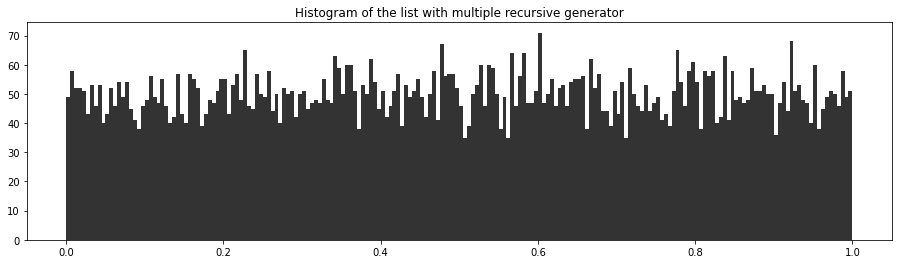

In [0]:
def Multiple_recursive_generator(x_0,I):
    K = 9
    x = [x_0]
    a = [6,3,2,5,7,5,3,1,4]
    M = 4
    
    for i in range (I):
        x_i = 0
        if len(x) > K: 
            lim = K
        else :
            lim = len(x)
        for k in range(lim):
            x_i += a[k]*x[i-k]
        x_i = x_i/M - int(x_i/M)
        x.append(x_i)
    return x[1:(len(x)-1)]

L = Multiple_recursive_generator(1,10000)        
#print(L)

figsize(15.5, 4)
plt.hist(L, bins=200, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the list with multiple recursive generator")
plt.ylim([0, None]);

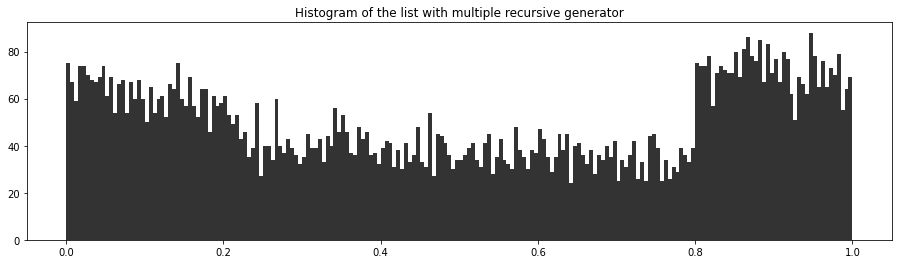

In [0]:
def inversive_congruential_generator(x_0,I):
    a_0 = 0.4
    a_1 = 5
    M = 3
    
    x = [x_0]
    
    for i in range (I):
        x_i = 0
        if (x[len(x)-1] != 0) :
            x_i = a_0 + (a_1/x[i])
            x_i = x_i/M - int(x_i/M)
        else:
            x_i = a_0
        x.append(x_i)
    return x[1:(len(x)-1)]

L = inversive_congruential_generator(1,10000)        
#print(L)

figsize(15.5, 4)
plt.hist(L, bins=200, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the list with multiple recursive generator")
plt.ylim([0, None]);

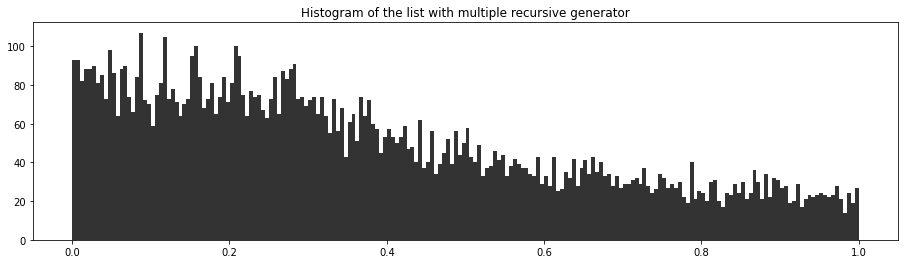

In [0]:
def multiplicative_congruential_generator(x_0, I):
    a_1 = 4
    M = 3
    x = []
    x_i__1 = x_0
    for i in range(I):
        x_i = a_1*x_i__1
        x_i = x_i/M - int(x_i/M)
        x.append(x_i)
        x_i__1 = x_i
    return x

L = multiplicative_congruential_generator(1,10000)        
#print(L)

figsize(15.5, 4)
plt.hist(L, bins=200, color="k", histtype="stepfilled", alpha=0.8)
plt.title("Histogram of the list with multiple recursive generator")
plt.ylim([0, None]);

### Pregunta 1.

In [0]:
mrc = Multiple_recursive_generator(1,100)
mcg = multiplicative_congruential_generator(1,100)
icg = inversive_congruential_generator(1,100)

L = [mrc,mcg,icg]
I = ["Multiple_recursive_generator","multiplicative_congruential_generator","inversive_congruential_generator"]

for i in range(3):
    mean = sum(L[i])/100
    print("El promedio de ",I[i]," de: ",mean)

El promedio de  Multiple_recursive_generator  de:  0.47300027279229634
El promedio de  multiplicative_congruential_generator  de:  0.4483096889807875
El promedio de  inversive_congruential_generator  de:  0.4676871895860249


### Pregunta 2.

In [0]:
import math

def Count_numbers(X): 
    i = 0
    suma = 0
    #while((suma < 1) and (i < len(X))):
     #   suma += X[i]
      #  i += 1
    I = []
    for j in range(len(X)):
      suma += X[j]
      i += 1
      if (suma >=1):
        suma = 0
        I.append(i)
        i = 0


    return I


MRC = []
MCG = []
ICG = []


mrc = Multiple_recursive_generator(2,1000)
mcg = multiplicative_congruential_generator(2,1000)
icg = inversive_congruential_generator(3,1000)
   
MRC = Count_numbers(mrc)
MCG = Count_numbers(mcg)
ICG = Count_numbers(icg)

sum_mrc = sum(MRC)/len(MRC)
sum_mcg = sum(MCG)/len(MCG)
sum_icg = sum(ICG)/len(ICG)
    
print("promedio de Multiple_recursive_generator es de ",sum_mrc)
print("promedio de multiplicative_congruential_generator es de ",sum_mcg)
print("promedio de inversive_congruential_generator es de ",sum_icg)
print("euler :" , math.e)


promedio de Multiple_recursive_generator es de  2.7645429362880884
promedio de multiplicative_congruential_generator es de  3.5551601423487544
promedio de inversive_congruential_generator es de  2.8220338983050848
euler : 2.718281828459045


## Parte II: Simulación de MonteCarlo 

1. Utilice las tres técnicas de números aleatorios desarrollados en la parte I para calcular el valor de $\pi$ (ver laboratorio 5)

  a. Grafique sus resultados. ¿qué método se desempeña mejor? 
  
  R:De por lejos el metodo más cercano es de multiple recursive generador, por si similitud a una distribución uniforme, que es la forma a la que se quiere llegar.


2. Investigue respecto de Importance Sampling en los métodos de monte carlo.

  a. Defina el concepto y su relación con la covarianza de los datos. 

  La importance Sampling es un estimador de la proporcióón entre distribucióónes, a partir de muestra generales de la distribución.

$
E[f(x)] \approx \frac{1}{n} \sum_{i} f(x_{i})*\frac {p( x_{i} )}{q(x_{i})}
$
con $i$ desde $1$ hasta $n$


Donde el resultado sera una representacion de que tan proporcionales son la distribución $p( x_{i} )$ con la distribución esperada de $q(x_{i})$, de una función de probabilidad.  


  Y la relacióón con la covarianza de los datos es que puede describir que tan ajustada estan los datos con respecto a la distribucióón que se espera.

  b. Muestre con ejemplo práctico la mejora de la simulación. 


Puede revisar los siguientes ejemplos:

- https://towardsdatascience.com/importance-sampling-introduction-e76b2c32e744

- https://www.scratchapixel.com/lessons/mathematics-physics-for-computer-graphics/monte-carlo-methods-in-practice/variance-reduction-methods

- https://github.com/kevinzakka/learn-monte-carlo/blob/master/Monte%20Carlo%20and%20Importance%20Sampling.ipynb

- http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-4.html

### Pregunta 1
##### a-


pi es aproximadamente  3.162


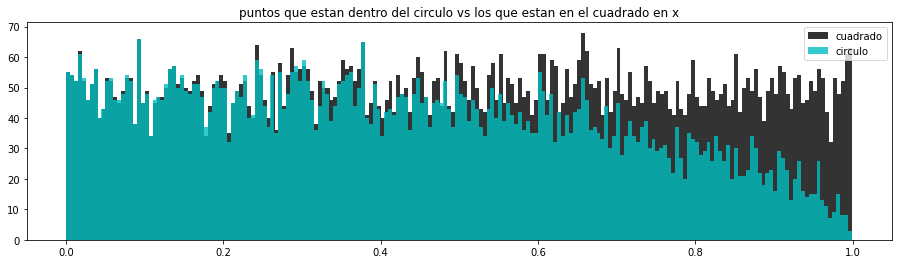

In [0]:
## Calculo de pi
X = Multiple_recursive_generator(2,10001)    
Y = Multiple_recursive_generator(3,10001)    

adentroCirculoX = []
adentroCirculoY = []

adentroCuadradoX =[]
adentroCuadradoY =[]

ptos_circulo = 0
ptos_cuadrado = 0
for i in range (10000):
    x = X[i] 
    y = Y[i]
    if(x*x + y*y <= 1):
        ptos_circulo += 1
        adentroCirculoX.append(x)
        adentroCirculoY.append(y)
    ptos_cuadrado += 1
    adentroCuadradoX.append(x)
    adentroCuadradoY.append(y)
    
    
print("pi es aproximadamente ", (ptos_circulo*4/ptos_cuadrado))    
    
figsize(15.5, 4)
plt.hist(adentroCuadradoX, bins=200, color="k",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoX, bins=200, color="c", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en x")
plt.ylim([0, None]);
plt.legend()

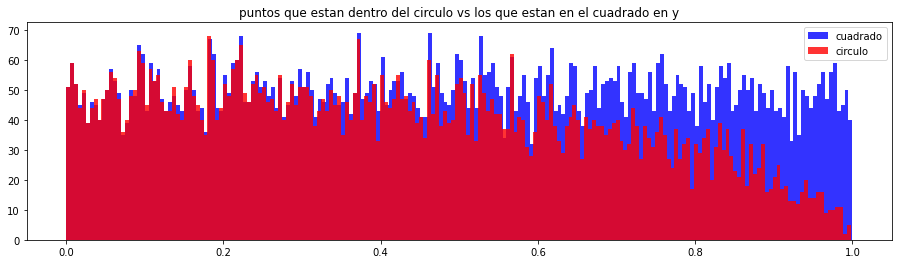

In [0]:
figsize(15.5, 4)
plt.hist(adentroCuadradoY, bins=200, color="b",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoY, bins=200, color="r", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en y")
plt.ylim([0, None]);
plt.legend()

pi es aproximadamente  2.9796


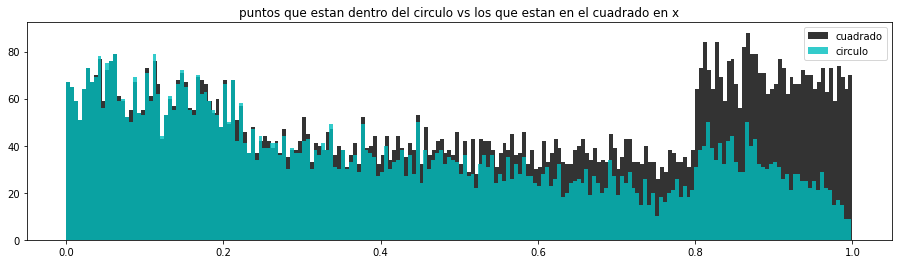

In [0]:
## Calculo de pi
X = inversive_congruential_generator(2,10001)    
Y = inversive_congruential_generator(3,10001)    

adentroCirculoX = []
adentroCirculoY = []

adentroCuadradoX =[]
adentroCuadradoY =[]

ptos_circulo = 0
ptos_cuadrado = 0
for i in range (10000):
    x = X[i] 
    y = Y[i]
    if(x*x + y*y <= 1):
        ptos_circulo += 1
        adentroCirculoX.append(x)
        adentroCirculoY.append(y)
    ptos_cuadrado += 1
    adentroCuadradoX.append(x)
    adentroCuadradoY.append(y)
    
    
print("pi es aproximadamente ", (ptos_circulo*4/ptos_cuadrado))    
    
figsize(15.5, 4)
plt.hist(adentroCuadradoX, bins=200, color="k",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoX, bins=200, color="c", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en x")
plt.ylim([0, None]);
plt.legend()

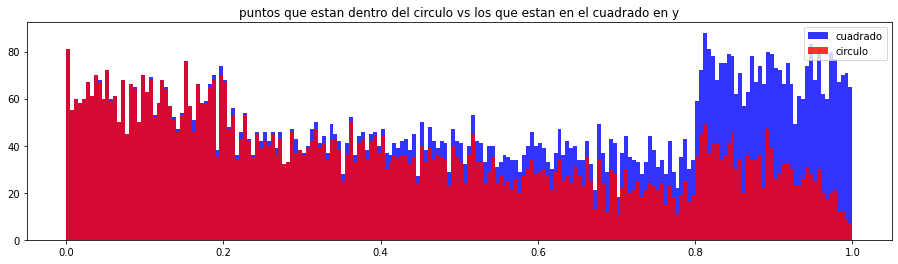

In [0]:
figsize(15.5, 4)
plt.hist(adentroCuadradoY, bins=200, color="b",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoY, bins=200, color="r", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en y")
plt.ylim([0, None]);
plt.legend()

pi es aproximadamente  3.7164


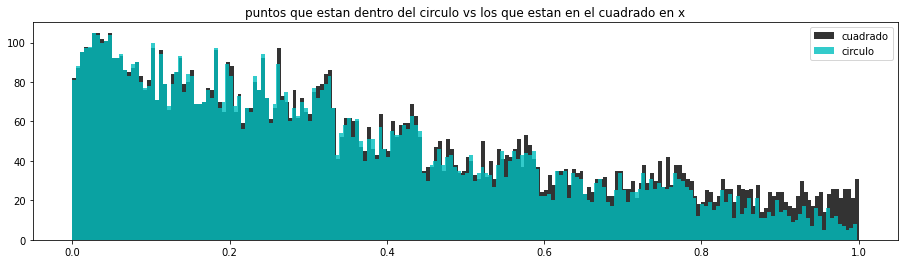

In [0]:
## Calculo de pi
X = multiplicative_congruential_generator(2,10001)    
Y = multiplicative_congruential_generator(1,10001)    

adentroCirculoX = []
adentroCirculoY = []

adentroCuadradoX =[]
adentroCuadradoY =[]

ptos_circulo = 0
ptos_cuadrado = 0
for i in range (10000):
    x = X[i] 
    y = Y[i]
    if(x*x + y*y <= 1):
        ptos_circulo += 1
        adentroCirculoX.append(x)
        adentroCirculoY.append(y)
    ptos_cuadrado += 1
    adentroCuadradoX.append(x)
    adentroCuadradoY.append(y)
    
    
print("pi es aproximadamente ", (ptos_circulo*4/ptos_cuadrado))    
    
figsize(15.5, 4)
plt.hist(adentroCuadradoX, bins=200, color="k",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoX, bins=200, color="c", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en x")
plt.ylim([0, None]);
plt.legend()

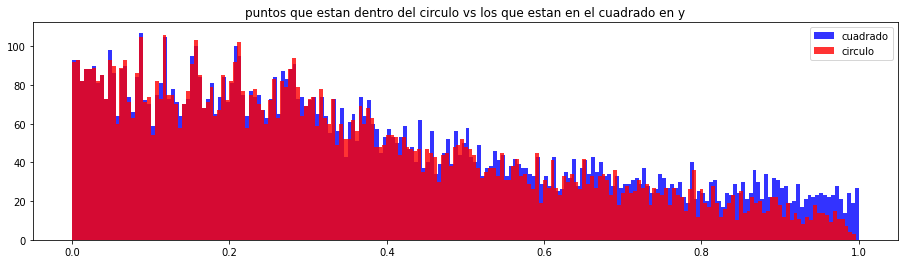

In [0]:
figsize(15.5, 4)
plt.hist(adentroCuadradoY, bins=200, color="b",label="cuadrado", histtype="stepfilled", alpha=0.8)
plt.hist(adentroCirculoY, bins=200, color="r", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en y")
plt.ylim([0, None]);
plt.legend()

### Pregunta 2 b.

pi es aproximadamente  3.0992


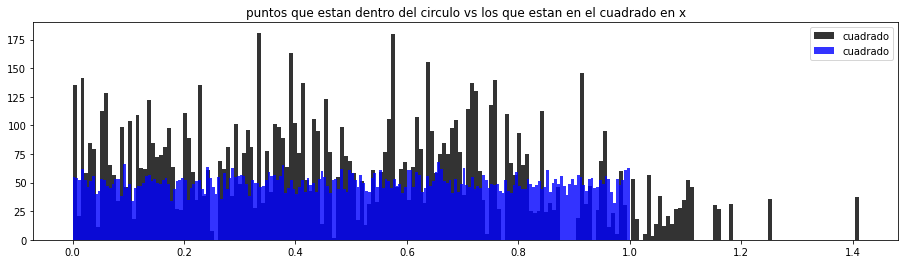

In [0]:
###  Importance Sampling 

### la distribución obtenida p(x)
### la distribucion deseada q(x) y como q(X) es uniforme
## r: numero de la dicritación
## el calculo segun 
## https://relopezbriega.github.io/blog/2016/06/29/distribuciones-de-probabilidad-con-python/


def P(X,x_i,r):
  
  j = 0
  y = 0
  while(y<x_i):
    y +=1/r

  total = 0
  for i in X:
    if ((i >= y) and (i<(y+(1/r)))):
      total += 1
  return total/r



r = 300
Q = r/10000

## Calculo de pi
X = Multiple_recursive_generator(2,10001)    
Y = Multiple_recursive_generator(3,10001)    


adentroCirculoX = []
adentroCirculoY = []

adentroCuadradoX =[]
adentroCuadradoY =[]

ptos_circulo = 0
ptos_cuadrado = 0



z = 0
for j in range(100000):
  c = np.random.uniform()
  z += P(X,c,r)/Q
z = z/100000

for i in range (10000):
    x = X[i] *P(X,X[i],r)/(Q*z)
    y = Y[i] *P(Y,Y[i],r)/(Q*z)
    if(x*x + y*y <= 1):
        ptos_circulo += 1
        adentroCirculoX.append(x)
        adentroCirculoY.append(y)
    ptos_cuadrado += 1
    adentroCuadradoX.append(x)
    adentroCuadradoY.append(y)
    
    
print("pi es aproximadamente ", (ptos_circulo*4/ptos_cuadrado))    
    
figsize(15.5, 4)
plt.hist(adentroCuadradoX, bins=200, color="k",label="cuadrado", histtype="stepfilled", alpha=0.8)
#plt.hist(X, bins=200, color="c", label="circulo", histtype="stepfilled", alpha=0.8)

plt.hist(X, bins=200, color="b",label="cuadrado", histtype="stepfilled", alpha=0.8)
#plt.hist(adentroCirculoX, bins=200, color="c", label="circulo", histtype="stepfilled", alpha=0.8)
plt.title("puntos que estan dentro del circulo vs los que estan en el cuadrado en x")
plt.ylim([0, None]);
plt.legend()

In [0]:
print(adentroCuadradoX[34])
print(X[34])

0.3693909565078145
0.2852625956875272


## Parte III: MCMC

Dados los datos del archivo avg_speed siga la metodología del laboratorio 6 para descubrir los clusters en los datos.

1. ¿Cuántos cluster a definido?
 > Hemos definido dos cluster por las dos montañas que se apresia en el histograma.
    

2. ¿Cuál es la probabilidad de cada cluster?

  > La probabilidad que estimamos es que para el mayor sea de un 80% y el menor del 20%

3. ¿Cuál es la distribución hipotética de cada cluster? ¿que supuestos ha hecho sobre los parámetros de cada distribución? 

 > El supuesto es que siguen una distribución normal, los supuestos que he hecho en cada distribucion es que tienen media 2.8  y una desviación estandar de  2.1 para el cluster mayor y para el menor media 5.6 con desviación estandar de 1.2 .
    

4. Grafique las iteraciones de la cadena de markov. 
5. Grafique los resultados obtenidos versus los supuestos realizados en los puntos anteriores. ¿En qué puntos los supuestos podrían cambiar para mejorar los resultados? 

6. Investigue respecto a la convergencia de la cadena con el método de autocorrelación y explique su funcionamiento. 

7. grafique la autocorrelación de sus resultados e indique si hay convergencia. 


[3.076 2.928 3.831 2.791 2.96  2.922 3.148 2.915 2.832 2.843] ...


11654

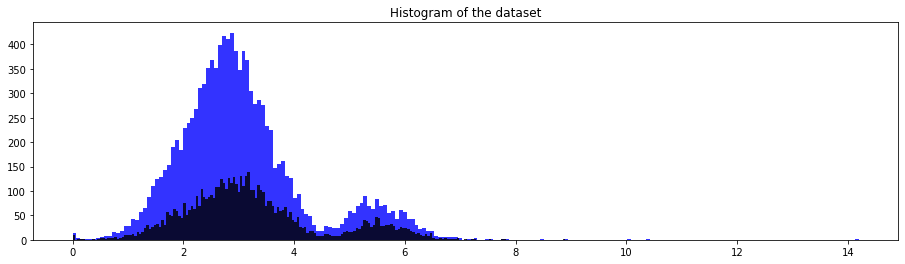

In [0]:
figsize(15.5, 4)
#data = np.loadtxt("avg_speed.csv", delimiter=",")
url = 'https://raw.githubusercontent.com/SebastianDuranV/proyecto_2_simulacion/master/PROYECTO%202/avg_speed.csv'
data = np.loadtxt(url,delimiter=",")

plt.hist(data, bins=200, color="b", histtype="stepfilled", alpha=0.8)
plt.hist(data[:6000], bins=200, color="k", histtype="stepfilled", alpha=0.8)

plt.title("Histogram of the dataset")
plt.ylim([0, None]);
print(data[:10], "...")
len(data)

In [0]:
import pymc3 as pm
import theano.tensor as T
import scipy
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

In [0]:
with pm.Model() as model:
    #Probabilidad de pertenecer al primer cluster Prior uniforme sobre (0,1).
    p1 = pm.Uniform('p', 0, 1)

    #Probabilidad de pertenecer al segundo cluster. 
    p2 = 1 - p1
    p = T.stack([p1, p2])
    #assignment = pm.Categorical("assignment", p, 
                          #      shape=data.shape[0],
                         #       testval=np.random.randint(0, 2, data.shape[0]))
    
    assignment = pm.Categorical("assignment", p, 
                                shape=6000,
                                testval=np.random.randint(0, 2, 6000))
    
    
print("prior assignment, with p = %.2f:" % p1.tag.test_value)
print(assignment.tag.test_value[:10])
print(len(assignment.tag.test_value))



NameError: ignored

In [0]:
with model:
    #Distribución de desviación estandar y media. 
    sds = pm.Uniform("sds", 0,3.4, shape=2)
    centers = pm.Normal("centers", 
                        mu=np.array([2.8, 5.6]), 
                        sd=np.array([2.1, 1.2]), 
                        shape=2)
    
    center_i = pm.Deterministic('center_i', centers[assignment])
    sd_i = pm.Deterministic('sd_i', sds[assignment])
    
    # Likelihood
    observations = pm.Normal("obs", mu=center_i, sd=sd_i, observed=data[:6000])
    
print("Random assignments: ", assignment.tag.test_value[:4], "...")
##print(len(assignment.tag.test_value))
print("Assigned center: ", center_i.tag.test_value[:4], "...")
#print(len(center_i.tag.test_value))
print("Assigned standard deviation: ", sd_i.tag.test_value[:4])
#print(len(sd_i.tag.test_value))

In [0]:
with model:
    step1 = pm.Metropolis(vars=[p, sds, centers])
    step2 = pm.ElemwiseCategorical(vars=[assignment])
    trace = pm.sample(2500, step=[step1, step2])

In [0]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = trace["centers"]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = trace["sds"]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = trace["p"]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0",
     color=colors[0], lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend();

In [0]:
with model:
    trace = pm.sample(5000, step=[step1], trace=trace)

In [0]:
figsize(12.5, 9)
plt.subplot(311)
lw = 1
center_trace = trace["centers"]

# for pretty colors later in the book.
colors = ["#348ABD", "#A60628"] if center_trace[-1, 0] > center_trace[-1, 1] \
    else ["#A60628", "#348ABD"]

plt.plot(center_trace[:, 0], label="trace of center 0", c=colors[0], lw=lw)
plt.plot(center_trace[:, 1], label="trace of center 1", c=colors[1], lw=lw)
plt.title("Traces of unknown parameters")
leg = plt.legend(loc="upper right")
leg.get_frame().set_alpha(0.7)

plt.subplot(312)
std_trace = trace["sds"]
plt.plot(std_trace[:, 0], label="trace of standard deviation of cluster 0",
     c=colors[0], lw=lw)
plt.plot(std_trace[:, 1], label="trace of standard deviation of cluster 1",
     c=colors[1], lw=lw)
plt.legend(loc="upper left")

plt.subplot(313)
p_trace = trace["p"]
plt.plot(p_trace, label="$p$: frequency of assignment to cluster 0",
     color=colors[0], lw=lw)
plt.xlabel("Steps")
plt.ylim(0, 1)
plt.legend();

In [0]:
figsize(11.0, 4)
std_trace = trace["sds"][2500:]
prev_std_trace = trace["sds"][:2000]

_i = [1, 2, 3, 4]
for i in range(2):
    plt.subplot(2, 2, _i[2 * i])
    plt.title("Posterior of center of cluster %d" % i)
    plt.hist(center_trace[:, i], color=colors[i], bins=30,
             histtype="stepfilled")

    plt.subplot(2, 2, _i[2 * i + 1])
    plt.title("Posterior of standard deviation of cluster %d" % i)
    plt.hist(std_trace[:, i], color=colors[i], bins=30,
             histtype="stepfilled")
    # plt.autoscale(tight=True)

plt.tight_layout()

In [0]:
%matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)

norm = stats.norm
x = np.linspace(0, 13, 500)
posterior_center_means = center_trace.mean(axis=0)
posterior_std_means = std_trace.mean(axis=0)
posterior_p_mean = trace["p"].mean()

plt.hist(data, bins=500, histtype="step", density=True, color="k",
     lw=2, label="histogram of data")
y = posterior_p_mean * norm.pdf(x, loc=posterior_center_means[0],
                                scale=posterior_std_means[0])

plt.plot(x, y, label="Cluster 0 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[1], alpha=0.3)

y = (1 - posterior_p_mean) * norm.pdf(x, loc=posterior_center_means[1],
                                      scale=posterior_std_means[1])
plt.plot(x, y, label="Cluster 1 (using posterior-mean parameters)", lw=3)
plt.fill_between(x, y, color=colors[0], alpha=0.3)

plt.legend(loc="upper left")
plt.title("Visualizing Clusters using posterior-mean parameters");

#### Referencias

[1] https://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter3_MCMC/Ch3_IntroMCMC_PyMC2.ipynb


## Parte IV: Conclusiones


1. Presente las conclusiones para cada parte de su trabajo. 